In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-washington/airbnb_Washington.csv
/kaggle/input/crunch/Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/crunch/Dataset.csv')
data_air = pd.read_csv('/kaggle/input/airbnb-washington/airbnb_Washington.csv')

In [4]:
data_air

,Airbnb Host ID,Airbnb Property ID,City_x,superhost_period_all,scrapes_in_period,Scraped Date,superhost_observed_in_period,host_is_superhost_in_period,superhost_ratio,prev_superhost_period_all,...,prev_host_is_superhost2,prev_year_superhosts,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean
0,3768.0,3192.0,Washington,7.0,9.0,2017-02-01,9.0,0.0,0.000000,6.0,...,0.0,0.0,129250.0,19381223.0,1102.0,106663.0,0.008526,0.005503,15.000000,NaN
1,3768.0,3192.0,Washington,8.0,14.0,2017-05-01,14.0,0.0,0.000000,7.0,...,0.0,0.0,118144.0,17089974.0,1228.0,110010.0,0.010394,0.006437,10.909091,15.000000
2,3768.0,3192.0,Washington,9.0,10.0,2017-08-08,10.0,0.0,0.000000,8.0,...,0.0,0.0,121747.0,16663763.0,1375.0,114104.0,0.011294,0.006847,NaN,10.909091
3,3768.0,3192.0,Washington,11.0,17.0,2018-02-05,17.0,0.0,0.000000,10.0,...,0.0,0.0,173120.0,24437011.0,1795.0,149928.0,0.010369,0.006135,NaN,NaN
4,3768.0,3297.0,Washington,5.0,10.0,2016-08-16,10.0,0.0,0.000000,4.0,...,0.0,0.0,76864.0,10118493.0,666.0,76059.0,0.008665,0.007517,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133736,27323824.0,42776834.0,Washington,19.0,110.0,2020-02-01,110.0,1.0,1.000000,18.0,...,0.0,1.0,74216.0,9178115.0,1481.0,272456.0,0.019955,0.029685,NaN,NaN
133737,27323824.0,42776834.0,Washington,20.0,117.0,2020-05-01,117.0,1.0,0.991453,19.0,...,0.0,2.0,68101.0,9309919.0,1280.0,235028.0,0.018796,0.025245,22.923077,NaN
133738,326322862.0,42791309.0,Washington,20.0,3.0,2020-05-09,3.0,0.0,0.000000,19.0,...,0.0,0.0,68101.0,9309919.0,1179.0,136242.0,0.017313,0.014634,-1.000000,NaN
133739,205105773.0,42810117.0,Washington,19.0,34.0,2020-02-07,34.0,0.0,0.000000,18.0,...,0.0,0.0,74216.0,9178115.0,986.0,138162.0,0.013286,0.015053,NaN,NaN


In [5]:
#data_air = data_air[['Airbnb Property ID', 'superhost_period_all']]

In [6]:
data_host = data_air[['Airbnb Host ID', 'superhost_period_all']]

In [7]:
data_air

,Airbnb Host ID,Airbnb Property ID,City_x,superhost_period_all,scrapes_in_period,Scraped Date,superhost_observed_in_period,host_is_superhost_in_period,superhost_ratio,prev_superhost_period_all,...,prev_host_is_superhost2,prev_year_superhosts,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean
0,3768.0,3192.0,Washington,7.0,9.0,2017-02-01,9.0,0.0,0.000000,6.0,...,0.0,0.0,129250.0,19381223.0,1102.0,106663.0,0.008526,0.005503,15.000000,NaN
1,3768.0,3192.0,Washington,8.0,14.0,2017-05-01,14.0,0.0,0.000000,7.0,...,0.0,0.0,118144.0,17089974.0,1228.0,110010.0,0.010394,0.006437,10.909091,15.000000
2,3768.0,3192.0,Washington,9.0,10.0,2017-08-08,10.0,0.0,0.000000,8.0,...,0.0,0.0,121747.0,16663763.0,1375.0,114104.0,0.011294,0.006847,NaN,10.909091
3,3768.0,3192.0,Washington,11.0,17.0,2018-02-05,17.0,0.0,0.000000,10.0,...,0.0,0.0,173120.0,24437011.0,1795.0,149928.0,0.010369,0.006135,NaN,NaN
4,3768.0,3297.0,Washington,5.0,10.0,2016-08-16,10.0,0.0,0.000000,4.0,...,0.0,0.0,76864.0,10118493.0,666.0,76059.0,0.008665,0.007517,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133736,27323824.0,42776834.0,Washington,19.0,110.0,2020-02-01,110.0,1.0,1.000000,18.0,...,0.0,1.0,74216.0,9178115.0,1481.0,272456.0,0.019955,0.029685,NaN,NaN
133737,27323824.0,42776834.0,Washington,20.0,117.0,2020-05-01,117.0,1.0,0.991453,19.0,...,0.0,2.0,68101.0,9309919.0,1280.0,235028.0,0.018796,0.025245,22.923077,NaN
133738,326322862.0,42791309.0,Washington,20.0,3.0,2020-05-09,3.0,0.0,0.000000,19.0,...,0.0,0.0,68101.0,9309919.0,1179.0,136242.0,0.017313,0.014634,-1.000000,NaN
133739,205105773.0,42810117.0,Washington,19.0,34.0,2020-02-07,34.0,0.0,0.000000,18.0,...,0.0,0.0,74216.0,9178115.0,986.0,138162.0,0.013286,0.015053,NaN,NaN


In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

In [9]:
data_air['Scraped Date'] = pd.to_datetime(data_air['Scraped Date'])

In [10]:
data.tail()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
51285,Office Supplies,Columbus,United States,CC-124304,Chuck Clark,US,2014-12-31,CA-2014-126221,Medium,OFF-AP-10002457,...,2015-01-06,Standard Class,Indiana,Appliances,0.00,1,56.5110,2,209,8.32
51286,Technology,Surabaya,Indonesia,MH-177851,Maya Herman,APAC,2014-12-31,IN-2014-78228,Medium,TEC-PH-10004402,...,2015-01-06,Standard Class,Jawa Timur,Phones,0.17,1,88.4208,4,294,13.57
51287,Office Supplies,Shantou,China,KM-162251,Kalyca Meade,APAC,2014-12-31,IN-2014-23754,Medium,OFF-EN-10002630,...,2015-01-07,Standard Class,Guangdong,Envelopes,0.00,1,24.7500,5,67,4.06
51288,Office Supplies,Shantou,China,KM-162251,Kalyca Meade,APAC,2014-12-31,IN-2014-23754,Medium,OFF-PA-10004727,...,2015-01-07,Standard Class,Guangdong,Paper,0.00,1,25.3800,3,79,1.41
51289,Technology,Shantou,China,KM-162251,Kalyca Meade,APAC,2014-12-31,IN-2014-23754,Medium,TEC-AC-10002324,...,2015-01-07,Standard Class,Guangdong,Accessories,0.00,1,6.8400,3,172,16.66


In [11]:
data['Sales'] = data['Sales'].str.replace(',', '').astype(float)

In [12]:
data['old_customer'] = data.duplicated(['Customer ID'])

In [13]:
data_air['old_property'] = data_air.duplicated(['Airbnb Property ID'])

In [14]:
data_air['old_property'] = data_air.duplicated(['Airbnb Property ID'])

In [15]:
data_air

,Airbnb Host ID,Airbnb Property ID,City_x,superhost_period_all,scrapes_in_period,Scraped Date,superhost_observed_in_period,host_is_superhost_in_period,superhost_ratio,prev_superhost_period_all,...,prev_year_superhosts,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,old_property
0,3768.0,3192.0,Washington,7.0,9.0,2017-02-01,9.0,0.0,0.000000,6.0,...,0.0,129250.0,19381223.0,1102.0,106663.0,0.008526,0.005503,15.000000,NaN,False
1,3768.0,3192.0,Washington,8.0,14.0,2017-05-01,14.0,0.0,0.000000,7.0,...,0.0,118144.0,17089974.0,1228.0,110010.0,0.010394,0.006437,10.909091,15.000000,True
2,3768.0,3192.0,Washington,9.0,10.0,2017-08-08,10.0,0.0,0.000000,8.0,...,0.0,121747.0,16663763.0,1375.0,114104.0,0.011294,0.006847,NaN,10.909091,True
3,3768.0,3192.0,Washington,11.0,17.0,2018-02-05,17.0,0.0,0.000000,10.0,...,0.0,173120.0,24437011.0,1795.0,149928.0,0.010369,0.006135,NaN,NaN,True
4,3768.0,3297.0,Washington,5.0,10.0,2016-08-16,10.0,0.0,0.000000,4.0,...,0.0,76864.0,10118493.0,666.0,76059.0,0.008665,0.007517,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133736,27323824.0,42776834.0,Washington,19.0,110.0,2020-02-01,110.0,1.0,1.000000,18.0,...,1.0,74216.0,9178115.0,1481.0,272456.0,0.019955,0.029685,NaN,NaN,False
133737,27323824.0,42776834.0,Washington,20.0,117.0,2020-05-01,117.0,1.0,0.991453,19.0,...,2.0,68101.0,9309919.0,1280.0,235028.0,0.018796,0.025245,22.923077,NaN,True
133738,326322862.0,42791309.0,Washington,20.0,3.0,2020-05-09,3.0,0.0,0.000000,19.0,...,0.0,68101.0,9309919.0,1179.0,136242.0,0.017313,0.014634,-1.000000,NaN,False
133739,205105773.0,42810117.0,Washington,19.0,34.0,2020-02-07,34.0,0.0,0.000000,18.0,...,0.0,74216.0,9178115.0,986.0,138162.0,0.013286,0.015053,NaN,NaN,False


In [16]:
data.tail()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost,old_customer
51285,Office Supplies,Columbus,United States,CC-124304,Chuck Clark,US,2014-12-31,CA-2014-126221,Medium,OFF-AP-10002457,...,Standard Class,Indiana,Appliances,0.00,1,56.5110,2,209.0,8.32,True
51286,Technology,Surabaya,Indonesia,MH-177851,Maya Herman,APAC,2014-12-31,IN-2014-78228,Medium,TEC-PH-10004402,...,Standard Class,Jawa Timur,Phones,0.17,1,88.4208,4,294.0,13.57,True
51287,Office Supplies,Shantou,China,KM-162251,Kalyca Meade,APAC,2014-12-31,IN-2014-23754,Medium,OFF-EN-10002630,...,Standard Class,Guangdong,Envelopes,0.00,1,24.7500,5,67.0,4.06,True
51288,Office Supplies,Shantou,China,KM-162251,Kalyca Meade,APAC,2014-12-31,IN-2014-23754,Medium,OFF-PA-10004727,...,Standard Class,Guangdong,Paper,0.00,1,25.3800,3,79.0,1.41,True
51289,Technology,Shantou,China,KM-162251,Kalyca Meade,APAC,2014-12-31,IN-2014-23754,Medium,TEC-AC-10002324,...,Standard Class,Guangdong,Accessories,0.00,1,6.8400,3,172.0,16.66,True


In [17]:
c_2011 = data[(data['Order Date'].dt.year == 2011) & (data['old_customer'] == False)]['Customer ID']
c_2012 = data[(data['Order Date'].dt.year == 2012) & (data['old_customer'] == False)]['Customer ID']
c_2013 = data[(data['Order Date'].dt.year == 2013) & (data['old_customer'] == False)]['Customer ID']
c_2014 = data[(data['Order Date'].dt.year == 2014) & (data['old_customer'] == False)]['Customer ID']

In [18]:
c_2011

0         AT-7352
1       EM-141402
2       TB-112801
3       JH-159851
6        MM-72602
          ...    
8969    TC-214751
8973    JL-151754
8983    PC-187454
8990     LO-71701
8992    CC-121001
Name: Customer ID, Length: 2890, dtype: object

In [19]:
list(data_air['superhost_period_all'].unique())

[7.0,
 8.0,
 9.0,
 11.0,
 5.0,
 10.0,
 12.0,
 16.0,
 17.0,
 18.0,
 6.0,
 13.0,
 14.0,
 15.0,
 19.0,
 20.0]

In [20]:
series_by_period = {}
for period in list(data_air['superhost_period_all'].unique()):
    filtered_customers = data_air[(data_air['superhost_period_all'] == period) & (data_air['old_property'] == False)]['Airbnb Property ID']
    
    # Creating Series with a name c_<year>
    series_name = f"c_{period}"
    series_by_period[series_name] = pd.Series(filtered_customers, name=series_name)

In [21]:
series_by_period['c_7.0']

0            3192.0
484         20067.0
720         30022.0
953         65024.0
1014        77428.0
            ...    
88559    17898421.0
88664    17910772.0
88765    17927340.0
88786    17927481.0
88938    17958894.0
Name: c_7.0, Length: 2007, dtype: float64

In [22]:
data_air['Scraped Date'].min()

Timestamp('2016-08-01 00:00:00')

In [23]:
one = data[['Customer ID', 'Order ID', 'Order Date']].drop_duplicates()

In [24]:
two = data_air[['Airbnb Property ID','superhost_period_all']].drop_duplicates()

In [25]:
three = data_host[['Airbnb Host ID','superhost_period_all']].drop_duplicates()

In [26]:
one['order_year'] = one['Order Date'].dt.to_period('Y')

In [27]:
one['cohort'] = one.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Y')

In [28]:
two['cohort'] = two.groupby('Airbnb Property ID')['superhost_period_all'].transform('min')

In [29]:
three['cohort'] = three.groupby('Airbnb Host ID')['superhost_period_all'].transform('min')

In [30]:
one

,Customer ID,Order ID,Order Date,order_year,cohort
0,AT-7352,HU-2011-1220,2011-01-01,2011,2011
1,EM-141402,IT-2011-3647632,2011-01-01,2011,2011
2,TB-112801,AG-2011-2040,2011-01-01,2011,2011
3,JH-159851,IN-2011-47883,2011-01-01,2011,2011
6,MM-72602,CA-2011-1510,2011-01-02,2011,2011
...,...,...,...,...,...
51282,TD-209953,MX-2014-114783,2014-12-31,2014,2012
51284,CK-23251,TZ-2014-8220,2014-12-31,2014,2013
51285,CC-124304,CA-2014-126221,2014-12-31,2014,2012
51286,MH-177851,IN-2014-78228,2014-12-31,2014,2011


In [31]:
two

,Airbnb Property ID,superhost_period_all,cohort
0,3192.0,7.0,7.0
1,3192.0,8.0,7.0
2,3192.0,9.0,7.0
3,3192.0,11.0,7.0
4,3297.0,5.0,5.0
...,...,...,...
133736,42776834.0,19.0,19.0
133737,42776834.0,20.0,19.0
133738,42791309.0,20.0,20.0
133739,42810117.0,19.0,19.0


In [32]:
three

,Airbnb Host ID,superhost_period_all,cohort
0,3768.0,7.0,5.0
1,3768.0,8.0,5.0
2,3768.0,9.0,5.0
3,3768.0,11.0,5.0
4,3768.0,5.0,5.0
...,...,...,...
133728,325981023.0,20.0,20.0
133729,31069333.0,20.0,20.0
133730,80728344.0,20.0,20.0
133735,331860010.0,20.0,20.0


In [33]:
df_cohort = one.groupby(['cohort', 'order_year']) \
              .agg(n_customers=('Customer ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_year - df_cohort.cohort).apply(attrgetter('n'))

In [34]:
df_cohort

,cohort,order_year,n_customers,period_number
0,2011,2011,2890,0
1,2011,2012,1949,1
2,2011,2013,2187,2
3,2011,2014,2387,3
4,2012,2012,1172,0
5,2012,2013,838,1
6,2012,2014,907,2
7,2013,2013,566,0
8,2013,2014,409,1
9,2014,2014,245,0


In [35]:
df_cohort2 = two.groupby(['cohort', 'superhost_period_all']) \
              .agg(n_customers=('Airbnb Property ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort2['period_number'] = (df_cohort2.superhost_period_all - df_cohort2.cohort)

In [36]:
df_cohort3 = three.groupby(['cohort', 'superhost_period_all']) \
              .agg(n_customers=('Airbnb Host ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort3['period_number'] = (df_cohort3.superhost_period_all - df_cohort3.cohort)

In [37]:
df_cohort3

,cohort,superhost_period_all,n_customers,period_number
0,5.0,5.0,2771,0.0
1,5.0,6.0,2429,1.0
2,5.0,7.0,2156,2.0
3,5.0,8.0,2035,3.0
4,5.0,9.0,2017,4.0
...,...,...,...,...
131,18.0,19.0,297,1.0
132,18.0,20.0,259,2.0
133,19.0,19.0,323,0.0
134,19.0,20.0,276,1.0


In [38]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [39]:
cohort_pivot2 = df_cohort2.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [40]:
cohort_pivot3 = df_cohort3.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [41]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [42]:
cohort_size2 = cohort_pivot2.iloc[:,0]
retention_matrix2 = cohort_pivot2.divide(cohort_size2, axis = 0)

In [43]:
cohort_size3 = cohort_pivot3.iloc[:,0]
retention_matrix3 = cohort_pivot3.divide(cohort_size3, axis = 0)

In [44]:
cohort_size2

cohort
5.0     4257.0
6.0     1776.0
7.0     2007.0
8.0     2136.0
9.0     1242.0
10.0    1136.0
11.0    1038.0
12.0     912.0
13.0     988.0
14.0     945.0
15.0     708.0
16.0     735.0
17.0     905.0
18.0     810.0
19.0     654.0
20.0     277.0
Name: 0.0, dtype: float64

In [45]:
retention_matrix

period_number,0,1,2,3
cohort,,,,
2011,1.0,0.674394,0.756747,0.825952
2012,1.0,0.715017,0.773891,NaN
2013,1.0,0.722615,NaN,NaN
2014,1.0,NaN,NaN,NaN


In [46]:
retention_matrix3

period_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
cohort,,,,,,,,,,,,,,,,
5.0,1.0,0.876579,0.778058,0.734392,0.727896,0.703717,0.674486,0.633345,0.607001,0.587153,0.544930,0.527607,0.514255,0.488993,0.473836,0.438109
6.0,1.0,0.825200,0.739130,0.708962,0.669920,0.642413,0.601597,0.571429,0.541260,0.507542,0.485359,0.475599,0.450754,0.435670,0.394854,NaN
7.0,1.0,0.800402,0.708640,0.638312,0.599464,0.540522,0.517749,0.500335,0.451440,0.428667,0.407904,0.395847,0.378433,0.336906,NaN,NaN
8.0,1.0,0.860013,0.756967,0.716137,0.653921,0.626053,0.601426,0.529488,0.513934,0.491899,0.483474,0.462735,0.432923,NaN,NaN,NaN
9.0,1.0,0.839490,0.752866,0.682803,0.639490,0.601274,0.549045,0.523567,0.528662,0.500637,0.475159,0.425478,NaN,NaN,NaN,NaN
10.0,1.0,0.853211,0.728440,0.680734,0.638532,0.581651,0.548624,0.530275,0.506422,0.480734,0.447706,NaN,NaN,NaN,NaN,NaN
11.0,1.0,0.799296,0.720070,0.656690,0.572183,0.556338,0.538732,0.515845,0.500000,0.454225,NaN,NaN,NaN,NaN,NaN,NaN
12.0,1.0,0.851508,0.770302,0.675174,0.633411,0.614849,0.598608,0.577726,0.526682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.0,1.0,0.852391,0.729730,0.654886,0.629938,0.611227,0.590437,0.528067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


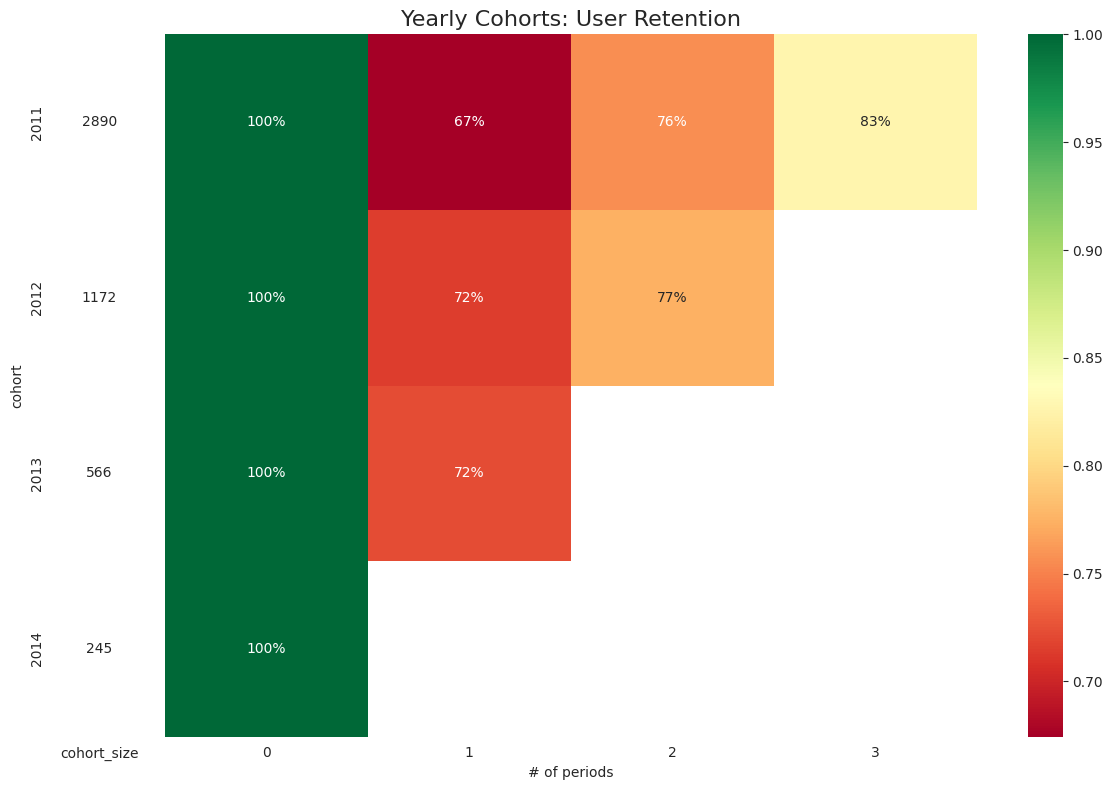

In [47]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Yearly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

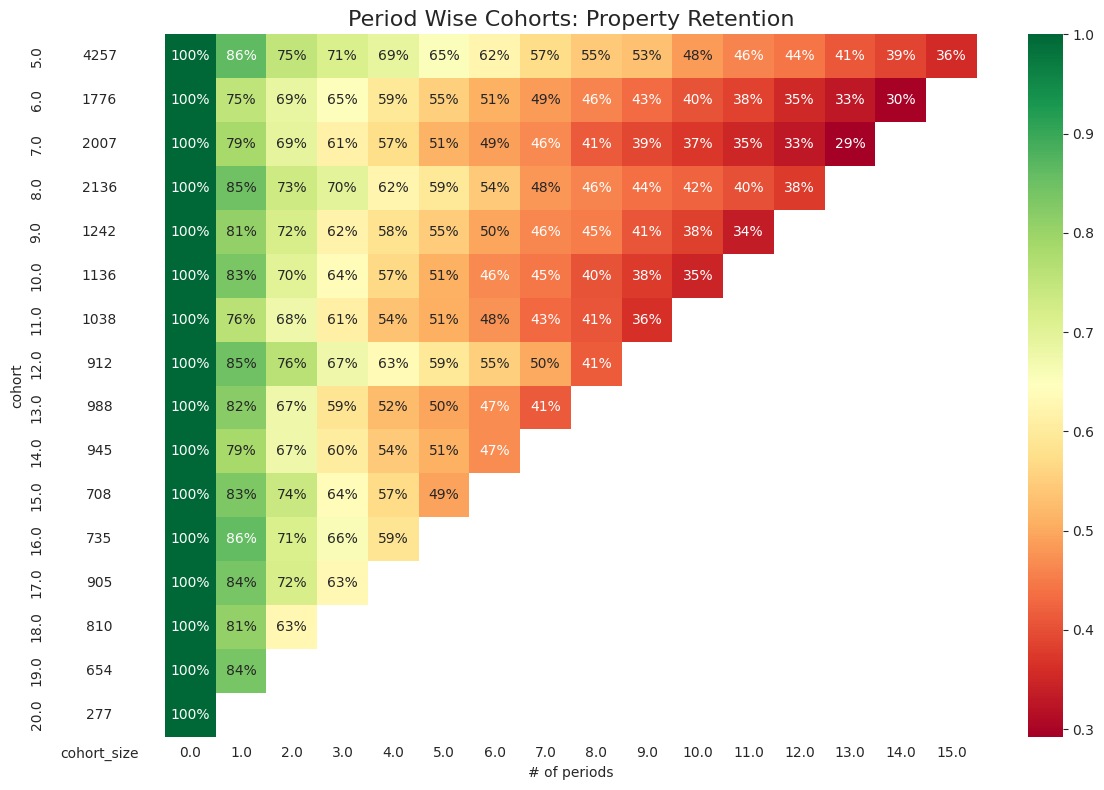

In [48]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix2, 
                mask=retention_matrix2.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Period Wise Cohorts: Property Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size2).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

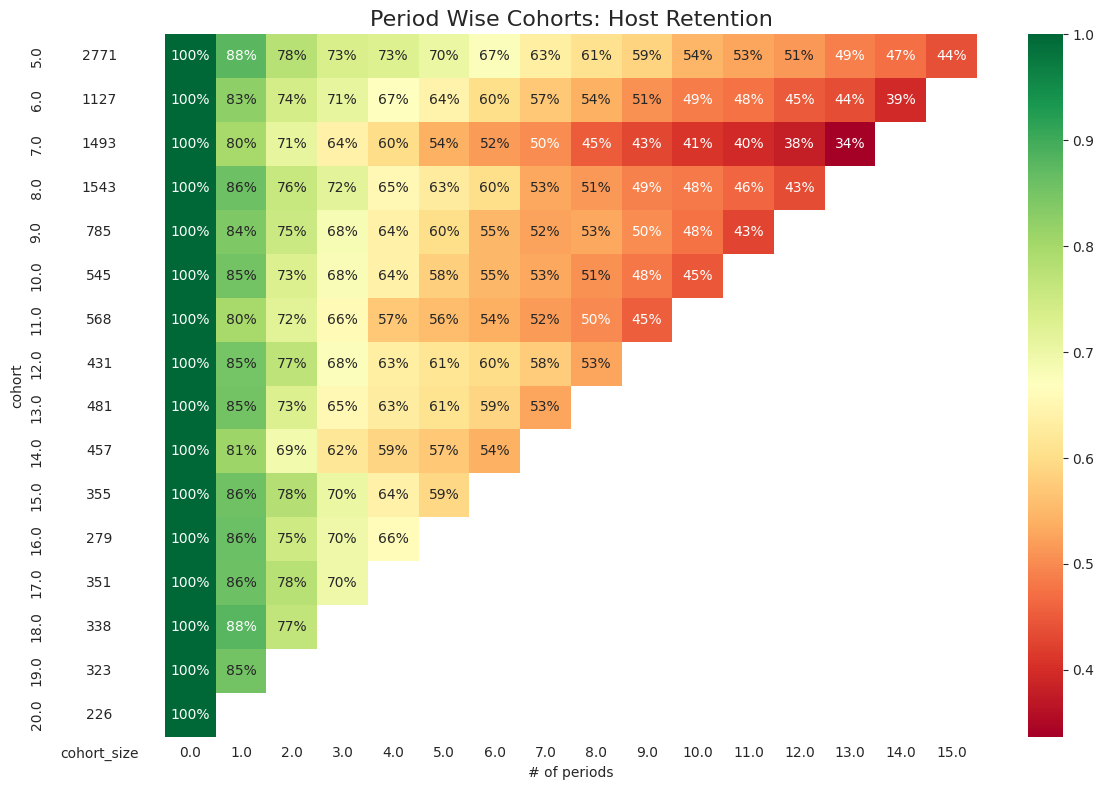

In [49]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix3, 
                mask=retention_matrix3.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Period Wise Cohorts: Host Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size3).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()